# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [3]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

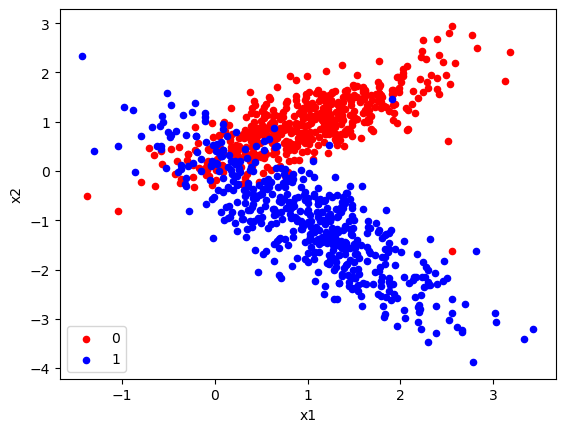

In [8]:
Xy = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label = y)) # put data into df
groups = Xy.groupby(['label']) # group data by label/class
fig, ax = plt.subplots()
colors = ["red", "blue"] #define colors
for idx, values in groups:
    values.plot(ax=ax, kind='scatter', x='x1', y='x2', label=idx, c=colors[idx])
plt.show()

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
clf = RandomForestClassifier()

clf.fit(X_train, y_train) # train the model on the training data
pred = clf.predict(X_test) # classify the test data
mse = mean_squared_error(y_test, pred)
print(mse)

0.07272727272727272


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [11]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

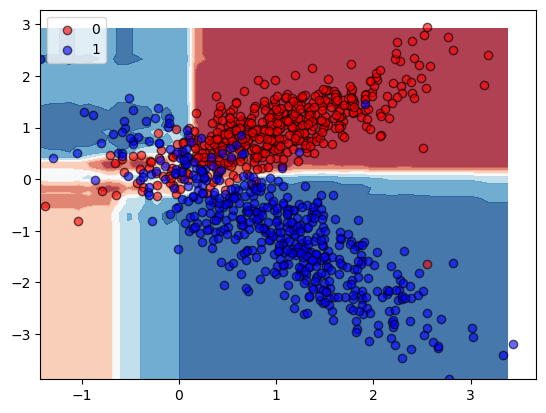

In [12]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

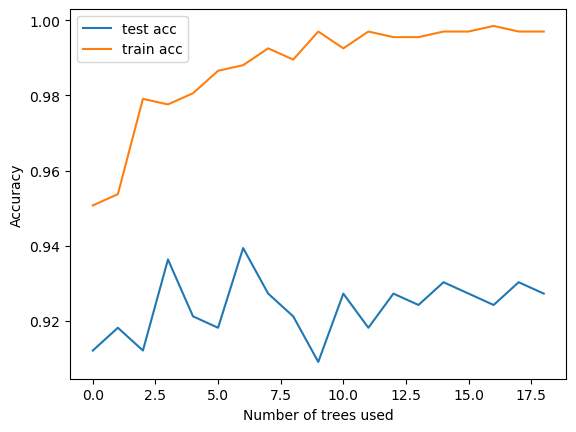

In [13]:
import matplotlib.pyplot as plt
acc = []
  
def doPrediction(name, X, y):
    mses = []
    r2s = []
    tree_num = 20
    for i in range(1, tree_num):
        model = RandomForestClassifier(n_estimators = i)
        model.fit(X_train, y_train)
        predictions = model.predict(X)
        mse = 1 - mean_squared_error(y, predictions)
        r2 = 1 - r2_score(y, predictions)
        mses.append(mse)
        r2s.append(r2)
    metrics = {"MSEs": mses, "R2s": r2s}
    return (name, metrics)
    
results = []
results.append(doPrediction("test acc", X_test, y_test))
results.append(doPrediction("train acc", X_train, y_train))
#print(results)     

fig, ax = plt.subplots()
for result in results:
    name = result[0]
    metrics = result[1]
    x = [i for i in range(0,len(metrics["MSEs"]))]
    plt.xlabel('Number of trees used')
    plt.ylabel('Accuracy')
    ax.plot(x, metrics["MSEs"], label=name)
    ax.legend()


<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

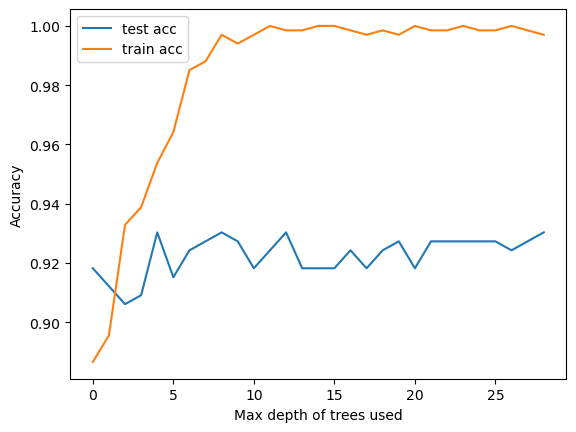

In [14]:
def doPredictionDepth(name, X, y):
    accs = []
    tree_depth = 30
    for i in range(1, tree_depth):
        model = RandomForestClassifier(n_estimators = 30, max_depth = i)
        model.fit(X_train, y_train)
        predictions = model.predict(X)
        acc = 1 - mean_squared_error(y, predictions)
        accs.append(acc)
    metrics = {"ACCs": accs}
    return (name, metrics)
    
results = []
results.append(doPredictionDepth("test acc", X_test, y_test))
results.append(doPredictionDepth("train acc", X_train, y_train))
#print(results)     

fig, ax = plt.subplots()
for result in results:
    name = result[0]
    metrics = result[1]
    x = [i for i in range(0,len(metrics["ACCs"]))]
    plt.xlabel('Max depth of trees used')
    plt.ylabel('Accuracy')
    ax.plot(x, metrics["ACCs"], label=name)
    ax.legend()



## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [15]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [16]:
churn_df.loc[churn_df['International plan'] == "No", 'International plan'] = 0
churn_df.loc[churn_df['International plan'] == "Yes", 'International plan'] = 1
churn_df = churn_df.astype({'International plan': 'int64'})
churn_df.loc[churn_df['Voice mail plan'] == "No", 'Voice mail plan'] = 0
churn_df.loc[churn_df['Voice mail plan'] == "Yes", 'Voice mail plan'] = 1
churn_df = churn_df.astype({'Voice mail plan': 'int64'})
churn_df = churn_df.drop(columns=['State'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

Text(0, 0.5, 'Feature importance')

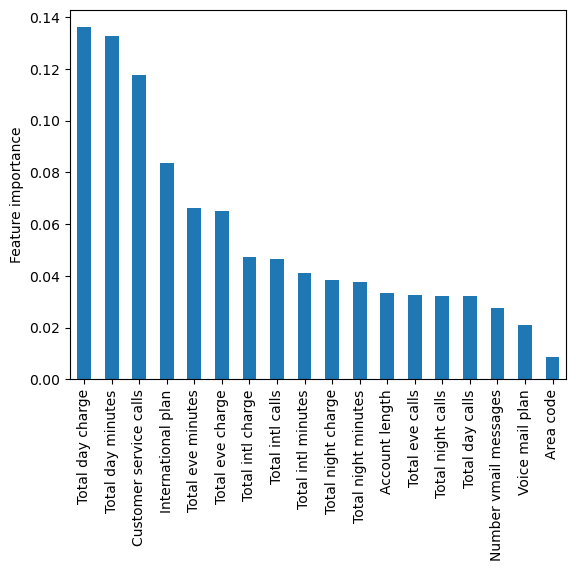

In [17]:
label = label.astype({'Churn': 'int64'})
X_train2, X_test2, y_train2, y_test2 = train_test_split(churn_df, label, test_size=.33, random_state=42)
clf2 = RandomForestClassifier()

clf2.fit(X_train2, y_train2) # train the model on the training data
#pred2 = clf.predict(X_test2) # classify the test data
importances = clf2.feature_importances_
feature_importances = pd.Series(importances, index=churn_df.columns)
feature_importances = feature_importances.sort_values(ascending = False)
fig, ax = plt.subplots()
feature_importances.plot.bar()
ax.set_ylabel("Feature importance")

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [20]:
X_reg, y_reg = make_regression(n_features=10, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_reg, y_reg, test_size=.33, random_state=5)
reg = RandomForestRegressor(max_depth = 500)
reg.fit(X_train3, y_train3)
pred2 = reg.predict(X_test3) 
mse2 = mean_squared_error(y_test3, pred2)
print(f"mean square error:",mse2)


mean square error 11109.58883701128
